**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

*Time series* biasa digunakan untuk memprediksi masa depan berdasarkan nilai - nilai sudah diamati sebelumnya contoh halnya digunakan dalam statistik, ramalan cuaca, prediksi harga saham, dan pengenalan pola, prediksi gempa bumi, dll. Jadi, *time series* itu sering banget diplot dengan grafik garis.

*Time series* disini tuh dibagi menjadi analisis *time series* dan peramalan time series. Analisis *time series* sering kali melibatkan metode - metode untuk menganalisis data *time series* guna menghasilkan statistika yang bermakna dan karakteristik lain data tersebut. Sedangkan peramalan *time series* adalah penggunaan model untuk memprediksi nilai - nilai masa depan berdasarkan nilai - nilai yang diamati sebelumnya.

## Time Series

**Import Library**

Dalam time series kita menggunakan beberapa library seperti halnya pandas, numpy, pyplot dalam matplotlib, seaborn, math, datetime, dan inline didalam matplotlib.
1. pandas : Library yang berguna untuk menganalisis data dan memanipulasi dataset.
2. numpy : Library yang biasanya digunakan para data scientist dalam menangani permasalahan angka - angka.
3. matplotlib : Library yang digunakan untuk memvisualisasikan data. Pada matplotlib digunakan submodul pyplot untuk membuat berbagai jenis plot, seperti plot garis, scatter plot, bar plot, histogram, dan masih banyak lainnya.
4. seaborn : Library yang kegunaannya sama seperti matplotlib untuk membuat visualisasi data yang menarik dan informatif, namun lebih tingkatnya lebih tinggi daripada matplotlib dan mempermudah pembuatan plot yang estetis dengan sedikit usaha.
5. math : Library yang dapat digunakan untuk berbagai keperluan perhitungan matematika didalam python.
6. datetime : Library yang digunakan untuk memanipulasi dan operasi terkait tanggal dan waktu, yaitu dengan melalukan tugas yang melibatkan perhitungan dan pemformatan tanggalan serta waktu.
7. %matplotlib inline itu untuk mengaktifkan tampilan grafik langsung didalam notebook dan hanya berlaku pada jupyter notebook saja.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/harshsingh2209/nvidia-stock-pricing-20172022

Dataset yang digunakan adalah data historis selama 5 tahun yaitu mulai dari 2017 - 2022 mengenai saham perusahan Nvidia. Nvidia sendiri merupakan perusahaan yang bergerak dalam bidang teknologi yang menyediakan solusi grafik, komputasi, jaringan di Amerika Serikat, Taiwan, China, dan Internasional lainnya. Pada data tersebut disajikan data mengenai harga harian dan perubahan dalam sehari. Harga tertinggi dan terendah untuk setiap harinya dapat membantu mengindentifikasi pola pada tingkat yang sangkat kecil. Volume perhari juga dicatat di data ini.

Import data yang sudah didownload pada kaggle dan kemudian di upload pada gdrive.

In [2]:
#https://drive.google.com/file/d/1uK_sNxuRBJp_0n4VO5H1fiB6i8n1TeM9/view?usp=drive_link

!gdown 1o_eVvJ_kAeKZFC32qHoUoARTd7l_OCXq

Downloading...
From: https://drive.google.com/uc?id=1o_eVvJ_kAeKZFC32qHoUoARTd7l_OCXq
To: /content/NVDA.csv
100% 90.7k/90.7k [00:00<00:00, 71.9MB/s]


Pertama kita gunakan pandas untuk membaca file dataset yaitu dengan format .CSV, lalu menggunakan perintah `dataset.head()` untuk menampilkan lima baris teratas dari dataset tersebut.

In [3]:
dataset = pd.read_csv('NVDA.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-12,36.470001,37.924999,35.527500,37.492500,37.076328,169753200
1,2017-06-13,38.599998,38.692501,36.412498,37.849998,37.429855,167250400
2,2017-06-14,37.880001,38.514999,37.125000,37.930000,37.508972,118464000
3,2017-06-15,36.740002,38.400002,36.625000,38.092499,37.669662,96382400
4,2017-06-16,38.189999,38.674999,37.560001,37.904999,37.484249,92496000


Pada data tersebut dapat dilihat tanggal saham tersebut dijual, harga pembukaan saham, harga tertinggi saham, harga terendah saham, harga akhir saham, harga saham saat market tutup serta total saham yang terjual dalam 1 hari.

Setelah itu, untuk mengetahui informasi mengenai dataset yang kita pilih gunakan `dataset.info`.


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


Pada dataset yang saya miliki terdapat 7 coloum, 1260 baris, baris pada data tersebut sama serta types datanya adalah float64, int64, dan object.


Kemudian kita cek apakah terdapat *missing value* dengan menggunakan `dataset.isnull().sum()`

In [5]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Pada dataset tersebut tidak ada *missing value*, sehingga kita bisa melanjutkannya.

Kemudian membuat ringkasan statisitk deskriptif mengenai dataset tersebut dengan `dataset.describe`. nah describe ini berguna untuk melihat gambaran umum mengenai datasetnya seperti informasi tentang persebaran data, mendeketeksi potensi outlier atau anomali dalam dataset yang telah dipelajari pada pertemuan pertama dan kedua.


In [6]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,104.245667,106.161260,102.120244,104.188327,103.927899,4.920926e+07
std,74.594439,76.233616,72.639107,74.435649,74.528081,2.500132e+07
min,31.622499,32.494999,31.115000,31.770000,31.554657,9.788400e+06
25%,47.730000,48.263749,46.923750,47.699374,47.265405,3.182070e+07
50%,63.825001,65.187500,62.774999,63.987499,63.539827,4.384260e+07
75%,140.021874,142.399372,137.488751,139.945625,139.818382,6.085220e+07
max,335.170013,346.470001,320.359985,333.760010,333.591766,2.511528e+08


Pada dataset tersebut didapatkan hasil statistiknya yaitu *count*,*mean*, std, *min*, kuartil bawah, *median*, kuartil atas, dan *max* pada setiap kolomnya

Langkah selanjutnya adalah menghandle *datetime* data untuk *time series*

In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-12,36.470001,37.924999,35.527500,37.492500,37.076328,169753200
2017-06-13,38.599998,38.692501,36.412498,37.849998,37.429855,167250400
2017-06-14,37.880001,38.514999,37.125000,37.930000,37.508972,118464000
2017-06-15,36.740002,38.400002,36.625000,38.092499,37.669662,96382400
2017-06-16,38.189999,38.674999,37.560001,37.904999,37.484249,92496000


Dengan menggunakan `dataset['Date'] = pd.to_datetime(dataset['Date'])` dapat mengubah kolom 'date' menjadi tipe data 'datetime'

Kemudian `dataset.set_index('Date', inplace=True)` digunakan untuk mengatur kolom 'Date' sebagai index DataFrame sehingga kita dapat dengan mudah melakukan operasi berdasarkan tanggal. Nah `inplace=True` biasanya digunakan untuk memodifikasi DataFrame asli tanpa membuat salinan baru.


Setelah itu menampilkan kembali DataFrame awal dengan index yang telah diperbaru menggunakan `dataset.head`

## Exploratory Data Analysis

Sekarang kita mulai menvisualisasikan data yang pertama visualisasikan kolom 'Adjusted Close' atau harga saham saat market tutup.

Pertama buat objek gambar baru dengan ukuran 11x8 inci dengan menggunakan `plt.figure(figsize=(11, 8))`.

Setelah itu menggunakan `dataset['Adj Close'].plot()` yang akan membuat plot berbentuk garis pada bagian kolom 'Adj Close'.

Berikan judul plot tersebut dengan cara `plt.title('Closing Price History')` dengan berjudul 'Closng Price History'. Buat juga label untuk x dan y nya dengan cara `plt.xlabel('Date')` dan `plt.ylabel('Closing Price')` dengan label x 'date' dan untuk y 'Closing Price'

Kemudian tampilkan plot yang telah ditentukan dengan `plt.show`

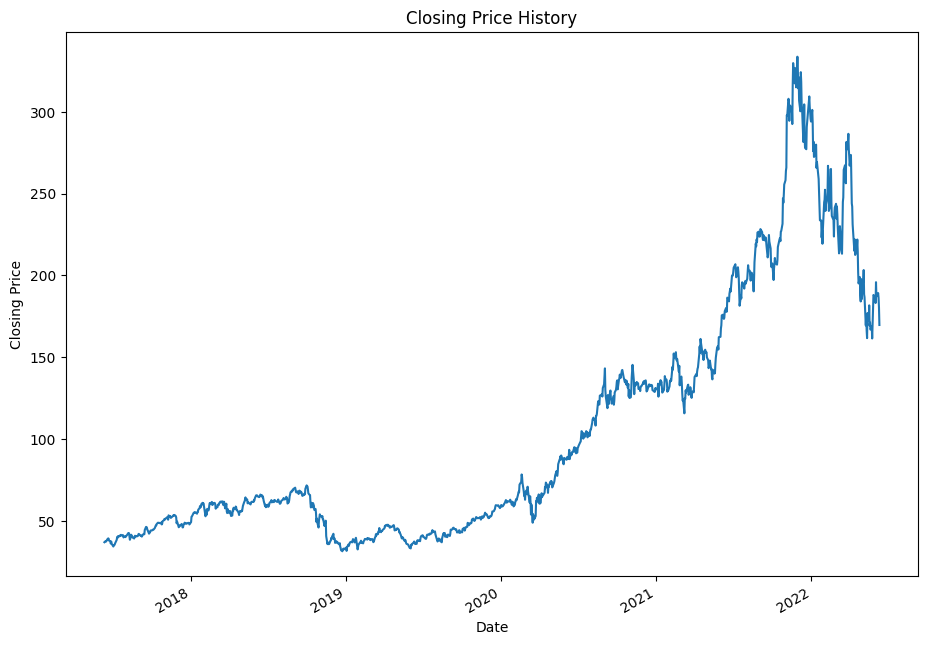

In [8]:
plt.figure(figsize=(11, 8)) # resizing the plot
dataset['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Pada plot tersebut dijelaskan bahwa data dimulai pada pertengah tahun 2017 hingga pertengahan tahun 2022. Pada pertengahan 2017 hingga awal 2020 kenaikan dan penurunan saham tidak terlalu signifikat. Namun pada 2020 saham tersebut mulai kenaikan secara drastis hingga 2022, menurut sepengalaman saya pada masa itu memang sedang zamannya masa pandemi COVID - 19 banyak orang mencari hiburan didalam rumah akibat adanya pembatasan dan karatina yang menyebabkan peningkatan permintaan untuk perangkat keras gaming dan grafis komputer. Sehingga hal tersebut membuat harga saham NVIDIA naik. Namun, pada tahun 2022  terjadi penurunan saham NVIDIA dikarena adanya penurunan pada harga saham Crypto hal tersebut dikarenakan NVIDIA yang biasa digunakan untuk mining mengalami penurunan peminat dikarenakan turunnya harga saham crypto.

Kemudian, membuat subplot dari kolom kolom dataset tersebut. Dengan menggunakan ukuran 16x8 inci untuk objek gambarnya, selanjutnya membuat subplot tersebut secara terpisah dengan ukuran subplot setiap kolom berukuran 11x9 inci menggunakan `cols = ['Open', 'Close', 'Volume', 'High', 'Low']` dan
`axes = dataset[cols].plot(figsize=(11, 9), subplots = True)` kemudian `subplots = True` akan memastikan bahwa setiap kolom akan ditampilkan dalam subplot yang terpisah. Kemudian tampilkan plot yang telah dibuat dengan `plt.show`

<Figure size 1600x800 with 0 Axes>

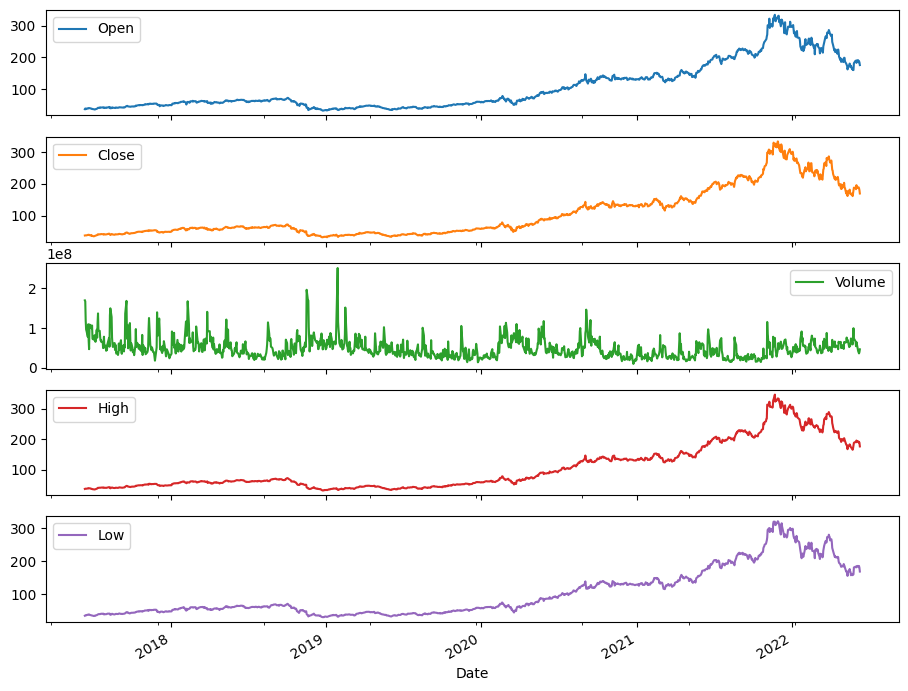

In [9]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = dataset[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Pada plot tersebut selain volume pergerakan saham diatas cenderung naik turun, namun mengalami pergerakan naik pada awal 2020.

**Membuat Percentage**

Kemudian membuat presetase **volatilitas harga harian** atau disebut dengan HL_PCT dengan melihat seberapa besar perbedaan antara kolom 'High' dan 'Low' dengan rumus `dataset['HL_PCT'] = (dataset['High'] - dataset['Low']) / dataset['Low'] * 100.0`. Selanjutnya menghitung presentase **perubahan harga penutupan harian** dengan atau disebut dengan PCT_Change yaitu memberikan informasi tentang perubahan harga relatif antara 'open' dan 'close' dengan rumus `dataset['PCT_change'] = (dataset['Close'] - dataset['Open']) / dataset['Open'] * 100.0`

In [10]:
dataset['HL_PCT'] = (dataset['High'] - dataset['Low']) / dataset['Low'] * 100.0
dataset['PCT_change'] = (dataset['Close'] - dataset['Open']) / dataset['Open'] * 100.0

In [11]:
df = dataset[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Setelah itu membuat DataFrame baru yang terdiri dari kolom 'HL_PCT', 'PCT_change', 'Adj Close','Volume' yang nantinya akan terfokus menganalisis pada kolom yang telah dipilih

**Membuat harga penutupan saham sebagai label**

In [12]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

63


<ipython-input-12-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


  Kemudian menghitung jumlah baris data yang akan diprediksi dimasa depan atau *forecasting*. Jumlah yang dihitung hanya 5% dari seluruh dataset

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Kemudian mengimpor modul dari library sklearn yang nantinya digunakan untuk memodelkan dan mengevaluasi regresi.

`from sklearn.preprocessing import StandardScaler` : digunakan untuk scalling fitur dalam pemrosesan data sebelum membangun model.

`from sklearn.linear_model import LinearRegression, Ridge` : digunakan untuk membangun model regresi linear.

`from sklearn.ensemble import RandomForestRegressor` : membangun model regresi menggunakana meode *ensemble random forest*.

`from sklearn.svm import SVR` : untuk memodelkan hubungan antara fitur - fitur input dan target.

`from sklearn.model_selection import train_set_split` : membagi dataset menjadi subset training dan test untuk memvalidasi kinerja model dan menghindari overfitting.

`from sklearn.metrics import mean_squared_log_error` : mengukur kesalahan logaritmik rata - rata kuadrat antara prediksi dan nilai target dalam regresi yang digunakan dalam evaluasi kinerja model regresi.

dari plot terlihat bahwa ada peningkatan saham secara keseluruhan.

**Menggunakan *scaler* untuk menormalisasi data**

In [14]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-14-b49179d05873>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Normalisasi data diperlukan agar range data yang berbeda - beda ukurannya tidak terlalu jauh, sehingga mempercepat training. Kemudian kita melakukan scalling data agar memiliki skala yang seragam, selanjutnya mengambil nilai - nilai fitur dari DataFrame dan menghitungnya. Setelah itu melakukan transformasi penskalaan pada data fitur dengan menggunakan parameter skala yang telah dihitung sebelumnya.

**Menentukan X**

In [15]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Data yang digunakan untuk prediksi di masa dengan adalah data fitur 'X' dan yang akan digunakan untuk training untuk membangun model yaitu data fitur 'X' yang sudah dihapus subset terakhirnya.

Subset yang dihapus berukuran `forecast_out` dan tidak akan digunakan dalam prooses pelatihan.

**Menentukan Y**

In [16]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-16-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Digunakan untuk memastikan bahwa data yang digunakan untuk pelatihan dan prediksi tidak mengandung *missing value*. setelah kolom label tersebut nantinya akan berisi nilai target yang ingin diprediksi

## Splitting Dataset


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

untuk testing set menggunakan 20% dari data keseluruhan. Kemudian nilai yang digunakan untuk mengontrol rrandomization yang digunakan dalam pemisaha data sebesar 42

**Linear Regression**

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

digunakan untuk memberikan informasi tentang seberapa baik model regresi linear tersebut cocok dengan testing set.

In [19]:
lr_confidence

0.8459092302614128

Hasilnya hampir mendekati 1 berarti cocok dengan data pengujian

**Random Forest Regressor**

In [20]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

digunakan untuk memberikan informasi tentang seberapa baik model regresi random forest tersebut cocok dengan testing set.

In [21]:
rf_confidence

0.9409580416594409

Hasilnya hampir mendekati 1 berarti cocok dengan data pengujian

Tingkat kepercayaan 'Random Forest' lebih besar dibandingkan 'Linear Regression', sehinga model random forest akan digunakan nantinya.

Kemudian menghasilkan prediksi data forecasting untuk hari berikutnya berdasarkan model regresi random forest yang telah di training.

In [22]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-22-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-22-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-22-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

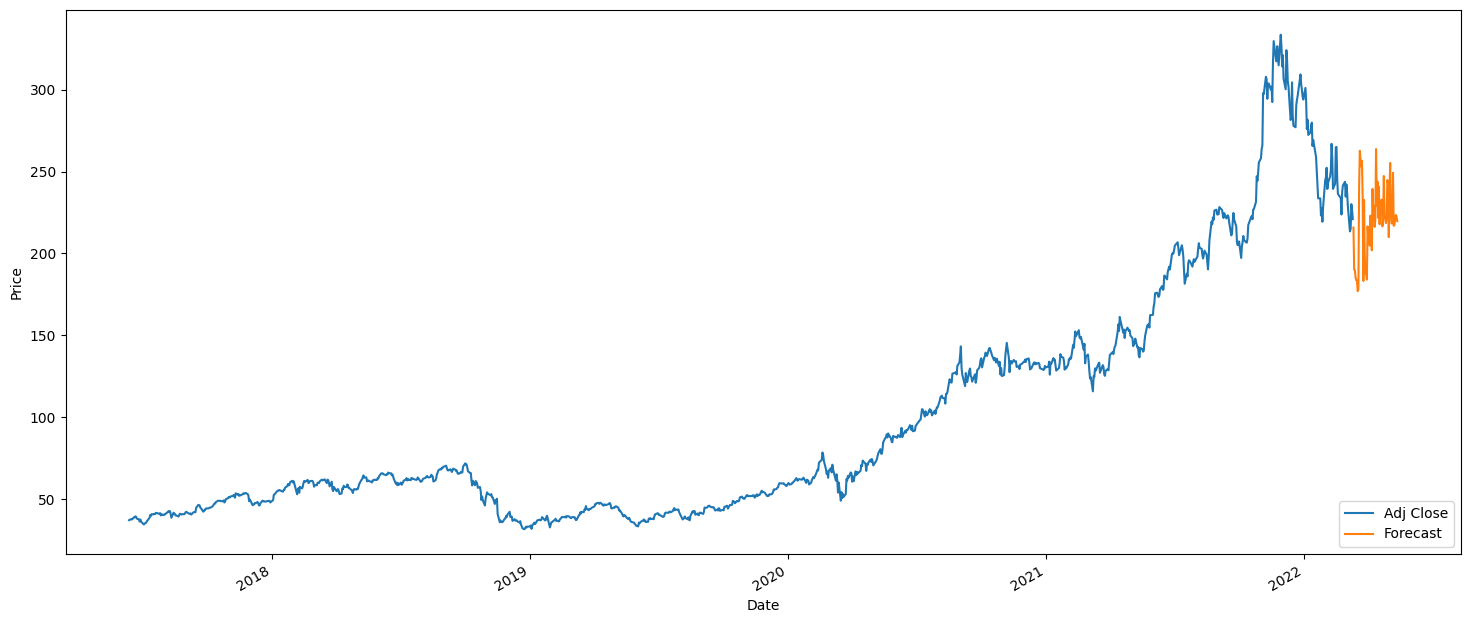

In [23]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Jadi hasil forecasting yang didapatkan setelah membaca data diwaktu sebelumnya untuk beberapa bulan kedepan yang ditunjukkan oleh bagian yang berwarna orange. dan harga yang ditampilkan sekitaran 175 hingga 250.
